In [50]:
import mdi.globals as gl
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import os
import pandas as pd

plt.style.use('default')

In [62]:
data = pd.read_csv("/cifs/diedrichsen/data/ModifiedDigitInterference/behavioural/MDI0_merged.csv")
data = data[(data.correct==1)] # & (data.BN>1)]
data.PosInQuartet = pd.Categorical(data.PosInQuartet, categories=[1, 2, 3, 4], ordered=True)
data.Quartet = pd.Categorical(data.Quartet, categories=['AAAA', 'AAMA', 'AARA'], ordered=True)
dataG = data.groupby(['SID', 'Quartet', 'PosInQuartet']).mean(numeric_only=True).reset_index()

/tmp/ipykernel_46846/3621258550.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dataG = data.groupby(['SID', 'Quartet', 'PosInQuartet']).mean(numeric_only=True).reset_index()


<Axes: xlabel='PosInQuartet', ylabel='ipi3'>

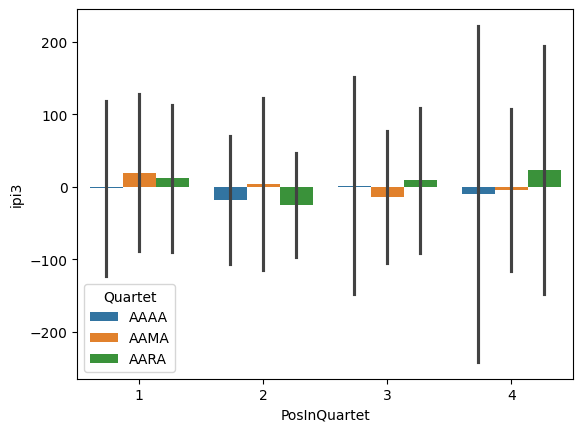

In [63]:
data_s = data.copy()
for sid in data_s.SID.unique():
    data_s.loc[data_s.SID == sid, "ipi3"] = data_s.loc[data_s.SID == sid, "ipi3"] - data_s.loc[data_s.SID == sid, "ipi3"].mean()
sb.barplot(data=data_s[data_s.SID == 106], x='PosInQuartet', y='ipi3', hue='Quartet', errorbar='sd')

In [64]:
melted_ipi = dataG.melt(id_vars=["Quartet", 'SID', 'PosInQuartet'],value_vars=["ipi1","ipi2","ipi3","ipi4"], value_name="IPI", var_name="IPI_id")
for sid in melted_ipi.SID.unique():
    melted_ipi.loc[melted_ipi.SID == sid, "IPI"] = melted_ipi.loc[melted_ipi.SID == sid, "IPI"] - melted_ipi.loc[melted_ipi.SID == sid, "IPI"].mean()

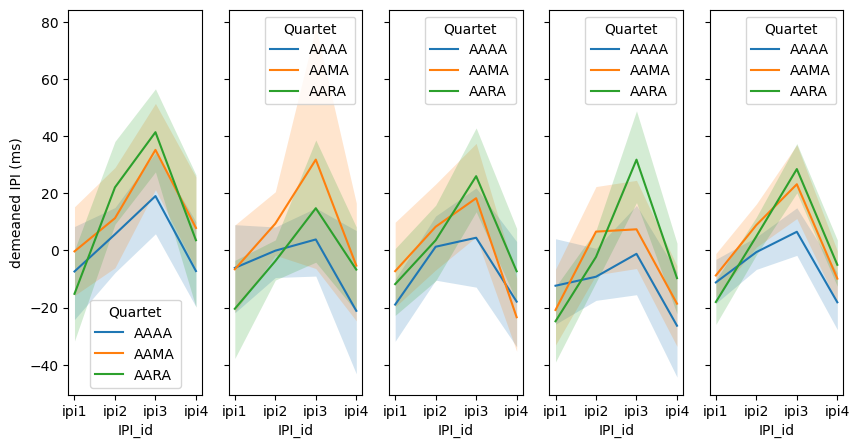

In [65]:
fig, axs = plt.subplots(1, 5, sharey=True, figsize=(10, 5))

for i in range(4):
    ax = axs[i]
    sb.lineplot(ax=ax, data=melted_ipi[melted_ipi.PosInQuartet == i+1], x="IPI_id",y="IPI",hue="Quartet", err_kws={'linewidth':0})
sb.lineplot(ax=axs[-1], data=melted_ipi, x="IPI_id", y="IPI",hue="Quartet", err_kws={'linewidth':0})
axs[0].set_ylabel('demeaned IPI (ms)')

plt.show()

<Axes: xlabel='IPI_id', ylabel='IPI'>

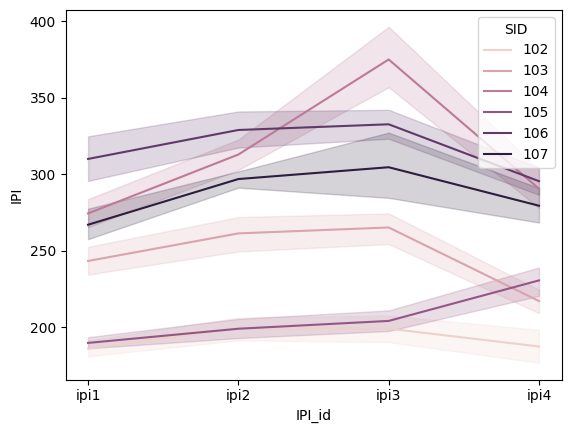

In [8]:
subj_ipi = dataG.melt(id_vars="SID",value_vars=["ipi1","ipi2","ipi3","ipi4"],var_name="IPI_id",value_name="IPI")
sb.lineplot(data=subj_ipi,x="IPI_id",y="IPI",hue="SID")

<function matplotlib.pyplot.show(close=None, block=None)>

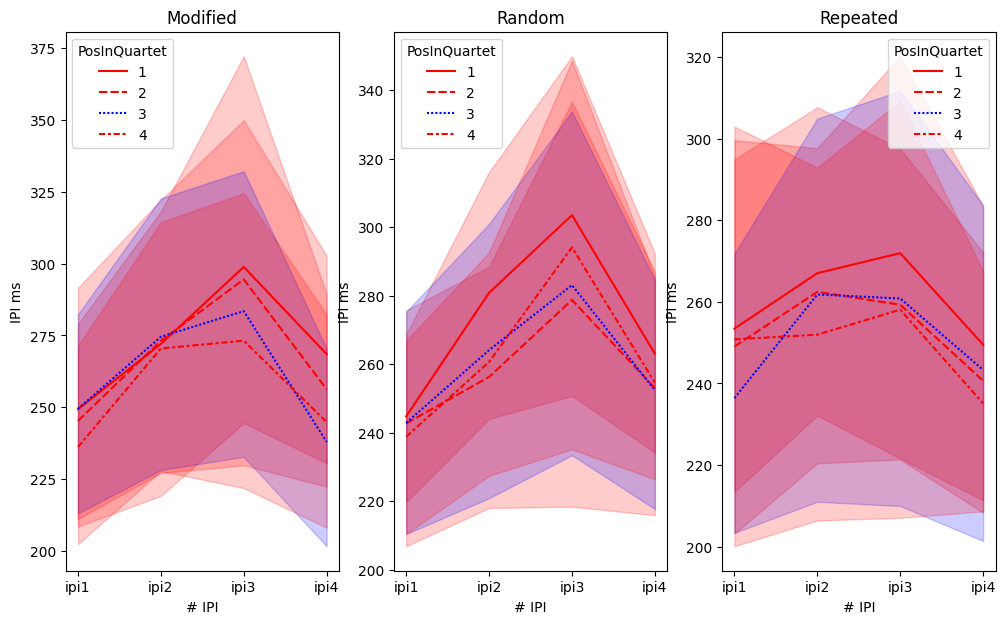

In [6]:
color_scheme = {1:[1,0,0],2:[1,0,0], 3:[0,0,1],4:[1,0,0]}


position_ipi = dataG.melt(id_vars=["PosInQuartet","QuartetType"],value_vars=["ipi1","ipi2","ipi3","ipi4"],var_name="# IPI",value_name="IPI ms")
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(12,7))
ax1 = sb.lineplot(data=position_ipi[position_ipi.QuartetType==1.0],x="# IPI",y="IPI ms",hue="PosInQuartet",style ="PosInQuartet",palette=color_scheme, ax=axes[0])
ax1.set_title("Modified")
ax2 = sb.lineplot(data=position_ipi[position_ipi.QuartetType==2.0],x="# IPI",y="IPI ms",hue="PosInQuartet",style ="PosInQuartet",palette=color_scheme,ax=axes[1])
ax2.set_title("Random")
ax3 = sb.lineplot(data=position_ipi[position_ipi.QuartetType==3.0],x="# IPI",y="IPI ms",hue="PosInQuartet",style ="PosInQuartet",palette=color_scheme,ax=axes[2])
ax3.set_title("Repeated")

plt.show

In [7]:
position_ipi

,PosInQuartet,QuartetType,# IPI,IPI ms
0,1,3.0,ipi1,196.857143
1,2,3.0,ipi1,178.888889
2,3,3.0,ipi1,176.081081
3,4,3.0,ipi1,172.361111
4,1,1.0,ipi1,193.571429
...,...,...,...,...
283,4,1.0,ipi4,292.702703
284,1,2.0,ipi4,296.756757
285,2,2.0,ipi4,270.131579
286,3,2.0,ipi4,274.250000
